## Support Vector Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv('SampleData.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)
dataset.head(5)

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

c:\users\nivas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [6]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [7]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,84.742698,70.564559
1,67.170656,51.051648
2,60.723602,70.257740
3,73.434642,73.129213
4,57.812513,63.912917
5,86.520538,92.265787
6,69.899682,51.639287
7,62.562382,91.034423
8,75.331242,69.251457
9,82.905981,71.694306


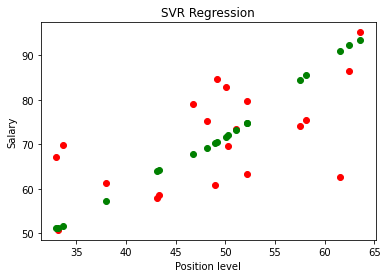

In [8]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Observation
We can see that there is a significant deviation of the predicted values with the real values of the test set. In this graph, the Real values are plotted in “Red” color and the Predicted values are plotted in “Green” color.

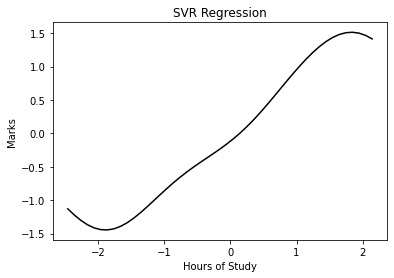

In [9]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

### Conclusion
From this experiment we can conclude that SVR with kernel function can generalise non-linear data. Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value.